In [2]:
#libreries de terceros
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import typing
import pickle

#ML libreries
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.exceptions import NotFittedError
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#MLflow libreries
import mlflow
from mlflow.models.signature import infer_signature
from mlflow.tracking import MlflowClient

In [6]:
df = pd.read_csv('C:/Users/Richard Alejandro/Workspace/project-MLflow/Mlflow_project_Linkscribe/website_classification.csv')

In [7]:
df.head()

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [8]:
df.isnull().sum()

Unnamed: 0              0
website_url             0
cleaned_website_text    0
Category                0
dtype: int64

In [9]:
df['Category'].value_counts()

Category
Education                          114
Business/Corporate                 109
Travel                             107
Streaming Services                 105
Sports                             104
E-Commerce                         102
Games                               98
News                                96
Health and Fitness                  96
Photography                         93
Computers and Technology            93
Food                                92
Law and Government                  84
Social Networking and Messaging     83
Forums                              16
Adult                               16
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Travel'),
  Text(1, 0, 'Social Networking and Messaging'),
  Text(2, 0, 'News'),
  Text(3, 0, 'Streaming Services'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'Photography'),
  Text(6, 0, 'Law and Government'),
  Text(7, 0, 'Health and Fitness'),
  Text(8, 0, 'Games'),
  Text(9, 0, 'E-Commerce'),
  Text(10, 0, 'Forums'),
  Text(11, 0, 'Food'),
  Text(12, 0, 'Education'),
  Text(13, 0, 'Computers and Technology'),
  Text(14, 0, 'Business/Corporate'),
  Text(15, 0, 'Adult')])

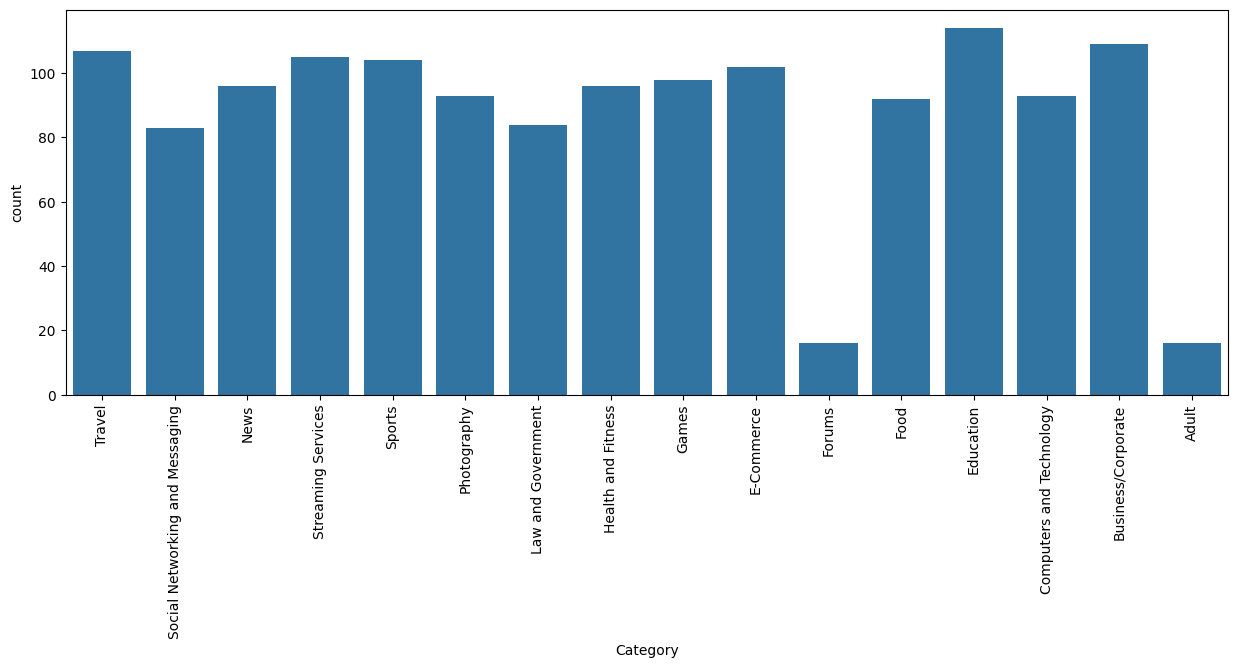

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Category', data=df)
plt.xticks(rotation = 90)

In [22]:
X = df['cleaned_website_text']
print(X)

0       official site good hotel accommodation big sav...
1       expedia hotel book sites like use vacation wor...
2       tripadvisor hotel book sites like previously d...
3       cheap flights search compare flights momondo f...
4       bot create free account create free account si...
                              ...                        
1403    old nude women porn mature granny sex horny ol...
1404    bdsm cams bdsm chat bondage cams free bdsm vid...
1405    porno dvd online european porn dvd cheap adult...
1406    anal dream house anal dream house anal dream h...
1407    world sex news daily sex news adult news eroti...
Name: cleaned_website_text, Length: 1408, dtype: object


In [ ]:
#X1 = df['website_url']
#print(X1)

In [13]:
y = df['Category']
print(y)

0       Travel
1       Travel
2       Travel
3       Travel
4       Travel
         ...  
1403     Adult
1404     Adult
1405     Adult
1406     Adult
1407     Adult
Name: Category, Length: 1408, dtype: object


In [14]:
label_classes = LabelEncoder()
label_classes.fit(y)

LabelEncoder()

In [15]:
label_classes.classes_

array(['Adult', 'Business/Corporate', 'Computers and Technology',
       'E-Commerce', 'Education', 'Food', 'Forums', 'Games',
       'Health and Fitness', 'Law and Government', 'News', 'Photography',
       'Social Networking and Messaging', 'Sports', 'Streaming Services',
       'Travel'], dtype=object)

In [16]:
y = label_classes.transform(y)
print(y)

[15 15 15 ...  0  0  0]


In [23]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [24]:
print('datos de entrenamiento:', x_train.shape)
print('targets de entrenamiento:', y_train.shape)
print('datos de teste:', x_test.shape)
print('targets de test:', y_test.shape)

datos de entrenamiento: (985,)
targets de entrenamiento: (985,)
datos de teste: (423,)
targets de test: (423,)


In [25]:
web_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])
web_clf.fit(x_train, y_train)

c:\Users\Richard Alejandro\Workspace\project-MLflow\Mlflow_project_Linkscribe\.venv\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [26]:
predictions = web_clf.predict(x_test)
print(confusion_matrix(y_test, predictions))

[[ 4  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0 29  1  3  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  2 20  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  1  0  0  0  0  0  0  2  0]
 [ 0  2  0  0 40  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 26  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  2  0  1  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0 24  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0 32  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1 28  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  0  0  1 21  0  1  1]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 33  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1  0 22]]


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.85      0.85      0.85        34
           2       0.71      0.87      0.78        23
           3       0.91      0.91      0.91        32
           4       0.98      0.93      0.95        43
           5       0.93      0.96      0.95        27
           6       0.00      0.00      0.00         4
           7       0.89      0.89      0.89        27
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        28
          10       0.94      0.97      0.96        33
          11       0.97      0.93      0.95        30
          12       1.00      0.81      0.89        26
          13       0.94      0.97      0.96        34
          14       0.89      1.00      0.94        31
          15       0.88      0.92      0.90        24

    accuracy                           0.92       423
   macro avg       0.87   

c:\Users\Richard Alejandro\Workspace\project-MLflow\Mlflow_project_Linkscribe\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Richard Alejandro\Workspace\project-MLflow\Mlflow_project_Linkscribe\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Richard Alejandro\Workspace\project-MLflow\Mlflow_project_Linkscribe\.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

In [39]:
with open('modelo_web.pkl', 'wb') as file:
    pickle.dump(web_clf, file)

In [3]:
with open('modelo_web.pkl', 'rb') as file:
    modelo_cargado = pickle.load(file)

In [4]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [5]:
# URL que deseas clasificar
url = "https://www.xvideos.es/"

# Realiza una solicitud para obtener el contenido de la página web
response = requests.get(url)

if response.status_code == 200:
    # Extrae el contenido de la página web
    html_content = response.text

    # Utiliza BeautifulSoup para analizar el contenido HTML
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extrae el texto visible de la página web (puedes personalizar esto según tu necesidad)
    page_text = soup.get_text()

    # Vectoriza el texto
    #vectorizer = CountVectorizer(vocabulary=vectorizer.vocabulary_)  # Utiliza el vectorizador que has entrenado antes
    #page_text_vectorized = vectorizer.transform([page_text])

    # Realiza la predicción con el modelo
    predicted_category = modelo_cargado.predict([page_text])[0]  # Suponiendo que "classifier" es tu modelo entrenado

    #predict_label = label_classes.inverse_transform([predicted_category])

    print(f"La categoría predicha para la URL {url} es: {predicted_category}")
else:
    print(f"No se pudo acceder a la URL {url}. Código de estado: {response.status_code}")

La categoría predicha para la URL https://www.xvideos.es/ es: 13
